K-Means clustering is an **unsupervised machine learning algorithm** used to group similar data points into clusters based on their features. Here's a breakdown:

### What is K-Means Clustering?

- **K** refers to the number of clusters you want to create.
- The algorithm assigns each data point to one of the clusters based on how similar it is to other points in that cluster.
- It tries to **minimize the distance** between the data points in the same cluster and the center of that cluster (called the centroid).

### Why Use K-Means?

- It’s useful when you want to **group data** based on similarity, but you don’t know the categories ahead of time.
- Helps in finding **patterns** in data by grouping similar points together.
- It's commonly used for **data segmentation**, where the data is divided into meaningful groups.

### Where We Use K-Means?

- **Customer segmentation**: Group customers based on purchasing habits, behavior, or preferences.
- **Image compression**: Reduce the number of colors in an image by clustering similar colors.
- **Market segmentation**: Group markets or audiences based on common characteristics.

### Example in Simple English

Imagine you have a store, and you want to group your customers based on their spending habits. You don’t know how many types of customers you have, but you suspect there are some patterns.

You use K-Means clustering to:
1. Choose a number of clusters (say, 3 types of customers).
2. The algorithm randomly selects 3 centers (centroids).
3. It then assigns each customer to the nearest centroid based on their spending pattern.
4. After that, the algorithm adjusts the centroids to better represent the data and reassigns customers.
5. This repeats until the centroids stabilize and the customers are divided into 3 groups.

### Output
You now have 3 customer segments, say:
- **High spenders**
- **Moderate spenders**
- **Low spenders**

This information helps you tailor marketing strategies for each group.

Would you like to dive into an example with code, or explore a specific use case further?

Understanding K-Means Clustering and Elbow Method
K-Means Clustering is an unsupervised machine learning algorithm that partitions a dataset into k clusters. The algorithm aims to minimize the within-cluster sum of squares (WCSS), which is the sum of the squared distances between each data point and its assigned cluster centroid.   

The Elbow Method is a technique used to determine the optimal number of clusters (k) in K-Means clustering. It involves plotting the WCSS against different values of k. The point where the graph starts to flatten or forms an "elbow" is often considered the optimal value for k.   



In [4]:
# this is a dummy set for apllying k-mean clustering.
import pandas as pd
df = pd.read_csv('student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


# Step first 
- Elbow method to find optimal k(no.of clusters)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

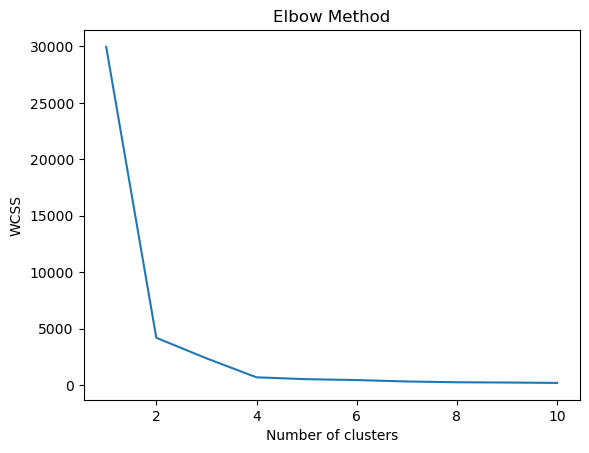

In [7]:
wcss = []

# Iterate through different values of k for the elbow method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)  # Corrected typo (n_clusters)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Access WCSS using inertia_

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    

In [8]:
# Based on the elbow curve, choose the optimal k (e.g., k=3 in this example)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

# Print the cluster assignments
print(y_kmeans)

[1 0 2 2 0 0 2 3 0 2 1 0 2 1 0 2 0 2 0 0 2 1 2 1 1 2 1 3 2 0 3 0 3 0 2 2 3
 0 1 0 1 2 2 1 3 3 2 0 3 0 1 1 3 2 3 0 0 3 0 3 0 2 2 3 1 3 2 1 0 2 0 3 2 1
 0 3 0 3 1 2 2 3 0 1 3 1 3 0 3 0 3 3 2 1 2 2 3 2 1 3 0 1 1 3 1 1 2 1 3 3 2
 3 0 0 2 3 2 0 3 1 1 0 2 3 2 1 2 0 1 2 2 0 1 1 0 3 0 1 2 2 2 1 0 1 1 3 1 3
 0 1 3 1 3 3 1 2 0 3 0 2 1 3 0 2 3 1 0 1 1 3 3 0 3 1 1 2 3 0 1 3 3 0 0 0 2
 1 2 2 3 0 2 2 1 1 2 1 3 0 0 3]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


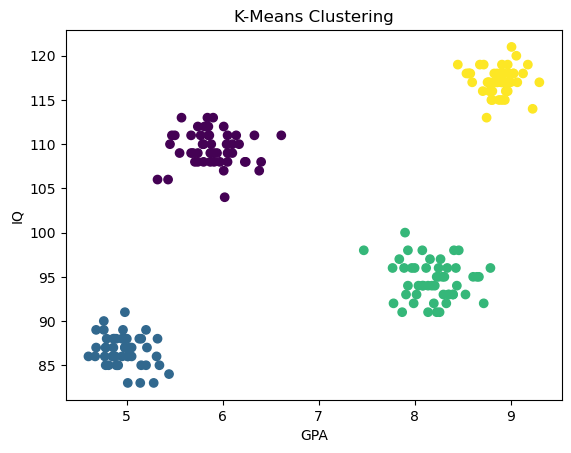

In [10]:
# Plot the clusters
plt.scatter(df['cgpa'], df['iq'], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('GPA')
plt.ylabel('IQ')
plt.show()

# clustering Results:

- The clustering analysis identified four distinct groups of students based on their GPA and IQ scores.

- **Blue Cluster:** This cluster represents students with below-average GPA and IQ. These students are likely to be struggling academically in both cognitive ability and academic performance.
  
- **Purple Cluster:** This cluster consists of students with higher IQ but lower GPA. These students may be considered intelligent but may not be putting in the necessary effort to achieve their full potential.
  
- **Green Cluster:** This cluster includes students with lower IQ but higher GPA. These students are likely to be hardworking and dedicated to their studies, overcoming challenges related to cognitive ability.
  
- **Yellow Cluster:** This cluster represents students with both high IQ and high GPA. These students are likely to be both intelligent and hardworking, demonstrating academic excellence.